In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix,classification_report

# data

In [2]:
np.random.seed(42)

In [3]:
def generate_correlated_clusters(n_samples,n_features,n_clusters,correlation=0.5,random_state=None):

    np.random.seed(random_state)

    X_blobs,y_blobs = make_blobs(n_samples=n_samples,centers=n_clusters,n_features=n_features,random_state=random_state)

    centers = np.array([X_blobs[y_blobs == i].mean(axis=0) for i in range(n_clusters)])

    X,y = [],[]

    for i,center in enumerate(centers):
    
        cov_matrix = np.full((n_features,n_features),correlation)  
        np.fill_diagonal(cov_matrix,1)  

        cluster_samples = np.random.multivariate_normal(mean=center,cov=cov_matrix,size=n_samples // n_clusters)

        X.append(cluster_samples)
        y.append(np.full(n_samples // n_clusters, i)) 

    X = np.vstack(X)
    y = np.hstack(y)

    return X, y

In [4]:
X, y = generate_correlated_clusters(n_samples=1000,n_features=2,n_clusters=2,correlation=0.1,random_state=42)
X = X + np.random.normal(scale=6,size=X.shape) 

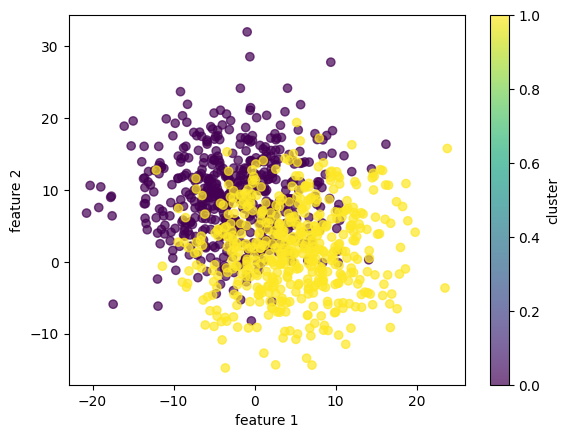

In [5]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=0.7)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.colorbar(label="cluster")
plt.show()

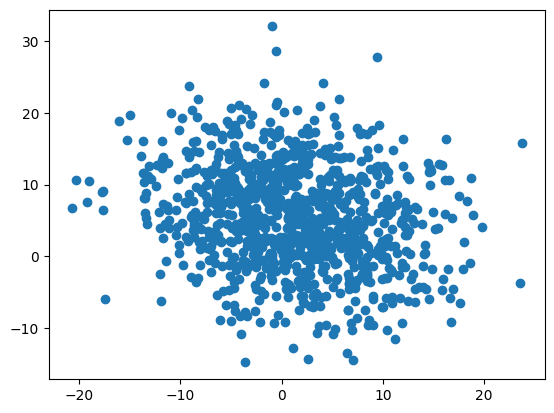

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [7]:
corr_dataset = pd.DataFrame(X) 

In [8]:
corr_dataset.columns = [f"vab_{col+1}" for col in corr_dataset.columns]

In [9]:
corr_dataset['target'] = y

In [10]:
corr_dataset

,vab_1,vab_2,target
0,-6.831659,7.718899,0
1,-8.761505,7.740707,0
2,-13.535939,10.343486,0
3,-4.183721,3.488238,0
4,1.434718,15.384688,0
...,...,...,...
995,-6.537895,-0.864577,1
996,-8.512996,6.150630,1
997,-8.672221,2.678594,1
998,-7.158826,-0.443087,1


In [11]:
# sns.pairplot(corr_dataset)

## correlation matrix

In [12]:
corr_dataset.iloc[:,:-1].corr()

,vab_1,vab_2
vab_1,1.000000,-0.229368
vab_2,-0.229368,1.000000


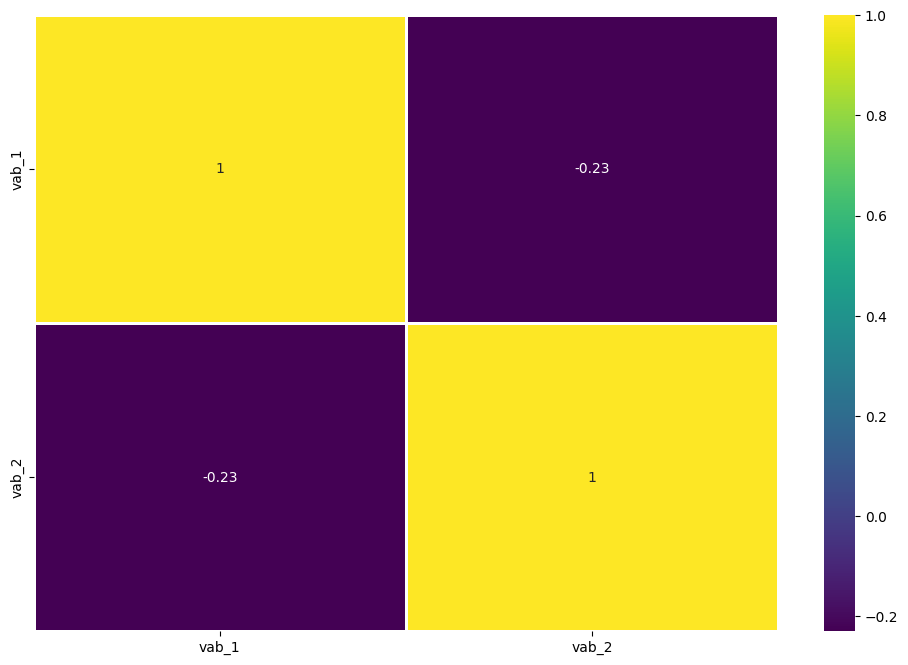

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_dataset.iloc[:,:-1].corr(),cmap='viridis',annot=True,linewidths=1)
plt.show()

### data standardization

In [14]:
X_values = corr_dataset.iloc[:,:-1].values

In [15]:
y_values = corr_dataset.iloc[:,-1].values

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_values = scaler.fit_transform(X_values)

In [19]:
np.mean(X_values),np.std(X_values)

(-1.9451107391432743e-16, 0.9999999999999998)

In [20]:
pd.DataFrame(X_values)

,0,1
0,-1.095994,0.305777
1,-1.367167,0.308852
2,-2.038047,0.675812
3,-0.723919,-0.290695
4,0.065556,1.386560
...,...,...
995,-1.054716,-0.904389
996,-1.332248,0.084670
997,-1.354621,-0.404845
998,-1.141966,-0.844964


<Axes: ylabel='Density'>

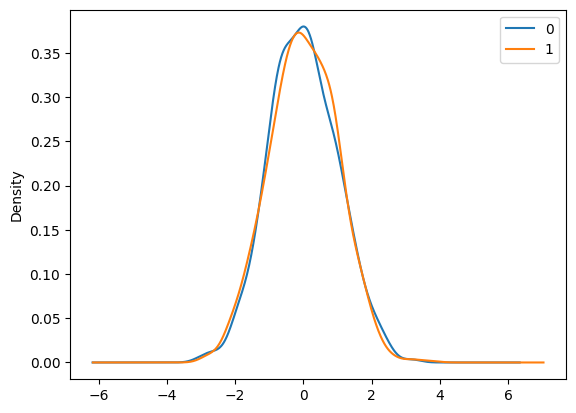

In [21]:
pd.DataFrame(X_values).plot(kind='density')

## pca application

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca_general = PCA()

In [24]:
pca_general.fit(X_values)

PCA()

In [25]:
explained_variance = pca_general.explained_variance_ratio_

In [26]:
explained_variance

array([0.61468382, 0.38531618])

In [27]:
eigenvalues = pca_general.explained_variance_

In [28]:
pd.DataFrame(eigenvalues)

,0
0,1.230598
1,0.771404


In [29]:
eigenvectors = pca_general.components_

### scree plot

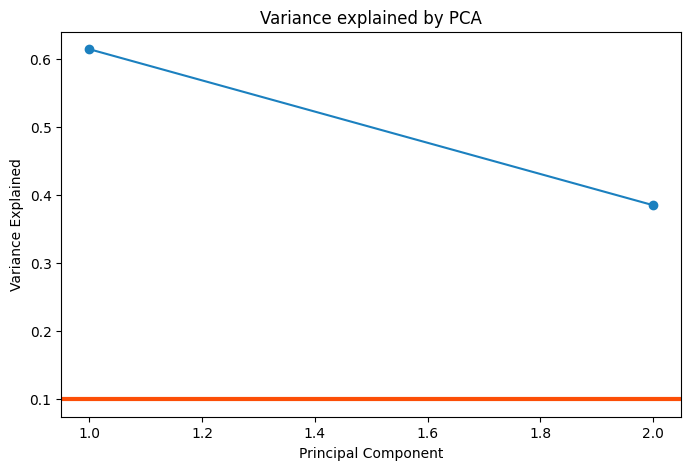

In [30]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [31]:
pca = PCA(n_components=2)

In [32]:
principal_components = pca.fit_transform(X_values)

In [33]:
pd.DataFrame(principal_components).head(8)

,0,1
0,0.991202,-0.558768
1,1.185124,-0.748342
2,1.918988,-0.963246
3,0.306336,-0.717440
4,0.934091,1.026802
5,1.133772,-1.342736
6,0.334499,-1.053344
7,0.008633,0.636610


In [34]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [35]:
final_df = pd.concat([principal_df,corr_dataset[['target']]],axis = 1)

In [36]:
final_df

,principal component 1,principal component 2,target
0,0.991202,-0.558768,0
1,1.185124,-0.748342,0
2,1.918988,-0.963246,0
3,0.306336,-0.717440,0
4,0.934091,1.026802,0
...,...,...,...
995,0.106297,-1.385297,1
996,1.001912,-0.882171,1
997,0.671593,-1.244130,1
998,0.210012,-1.404972,1


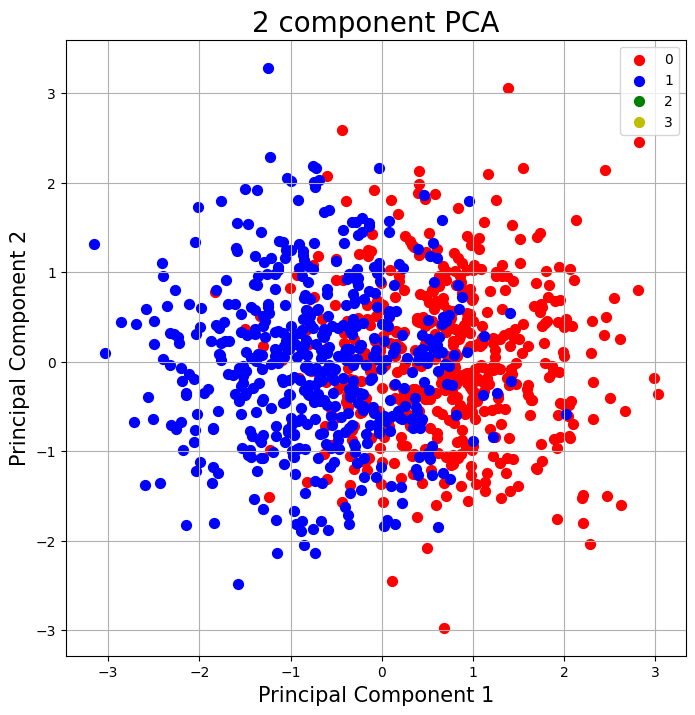

In [37]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

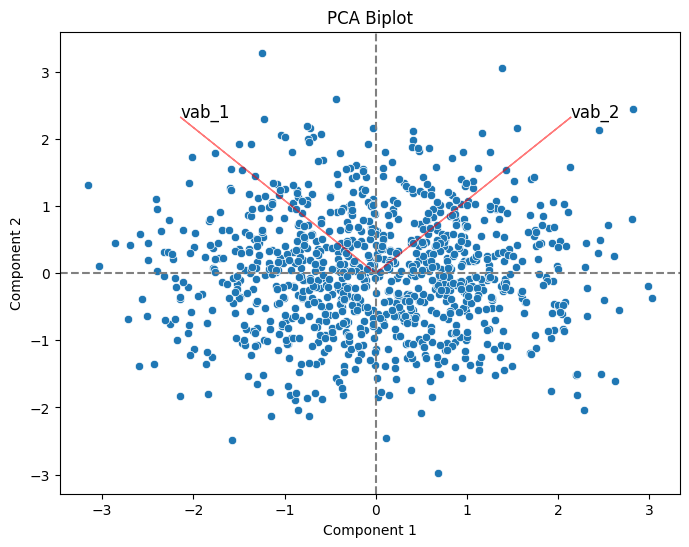

In [38]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(corr_dataset.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

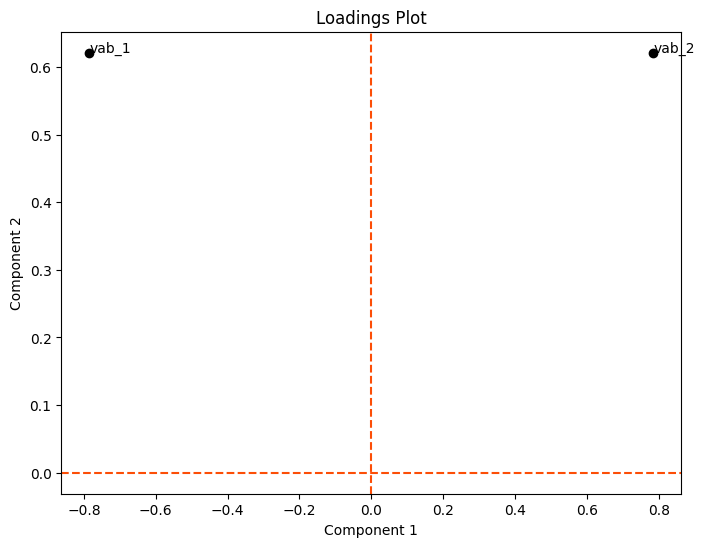

In [39]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(corr_dataset.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [40]:
scores_pca = pca.transform(X_values)

In [41]:
pd.DataFrame(scores_pca).head()

,0,1
0,0.991202,-0.558768
1,1.185124,-0.748342
2,1.918988,-0.963246
3,0.306336,-0.717440
4,0.934091,1.026802


## t-SNE

In [42]:
from sklearn.manifold import TSNE

In [43]:
tsne = TSNE(n_components=2,random_state=42)

In [44]:
X_tsne = tsne.fit_transform(X_values)

In [45]:
tsne_data = pd.concat([pd.DataFrame(X_tsne,columns=('dim_1','dim_2')),corr_dataset['target']],axis=1)

In [46]:
tsne_data

,dim_1,dim_2,target
0,21.010347,-11.008331,0
1,23.139248,-15.479180,0
2,33.216434,-13.897078,0
3,7.094006,-17.272367,0
4,15.493345,23.264412,0
...,...,...,...
995,-2.922516,-26.260843,1
996,20.128437,-17.588232,1
997,16.330326,-22.468996,1
998,-1.909281,-26.522717,1


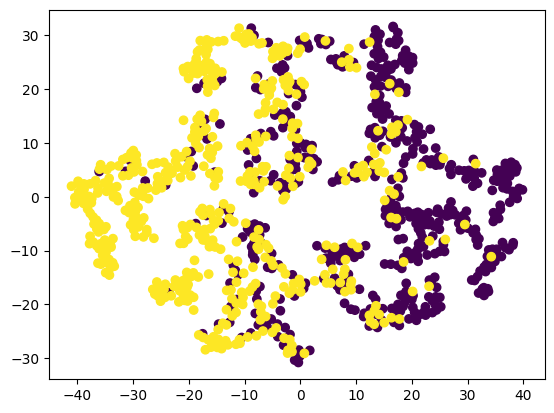

In [47]:
plt.scatter(x=tsne_data['dim_1'],y=tsne_data['dim_2'],c=tsne_data['target'])
plt.show()

In [48]:
tsne.kl_divergence_

0.4893057346343994

## UMAP

In [49]:
import umap

In [50]:
umap = umap.UMAP()

In [51]:
X_UMAP = umap.fit_transform(X_values)

In [52]:
UMAP_data = pd.concat([pd.DataFrame(X_UMAP,columns=('dim_1','dim_2')),corr_dataset['target']],axis=1)

In [53]:
UMAP_data

,dim_1,dim_2,target
0,1.913450,2.336082,0
1,2.114172,0.888477,0
2,1.193877,0.036904,0
3,4.834045,2.143172,0
4,0.609936,8.844446,0
...,...,...,...
995,5.744313,0.642846,1
996,3.097397,0.853061,1
997,4.129841,0.523295,1
998,5.577762,0.611897,1


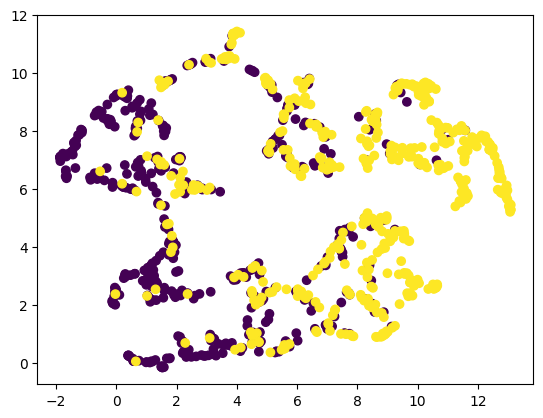

In [54]:
plt.scatter(UMAP_data['dim_1'],UMAP_data['dim_2'],c=UMAP_data['target'])
plt.show()

## k-means 

In [55]:
from sklearn.cluster import KMeans

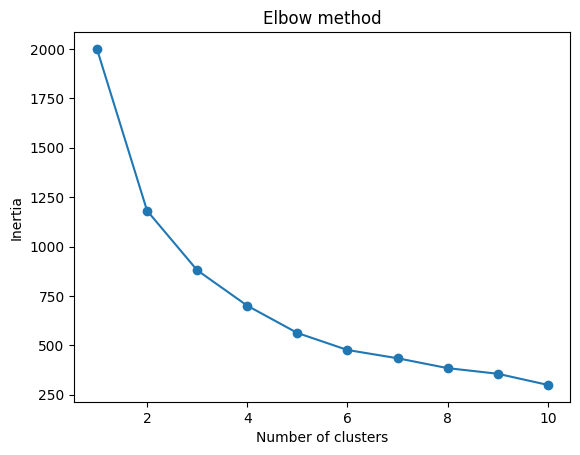

In [56]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [57]:
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [58]:
kmeans.fit(X_values)

KMeans(n_clusters=2, random_state=42)

In [59]:
corr_dataset['k_means'] = kmeans.labels_

In [60]:
corr_dataset

,vab_1,vab_2,target,k_means
0,-6.831659,7.718899,0,0
1,-8.761505,7.740707,0,0
2,-13.535939,10.343486,0,0
3,-4.183721,3.488238,0,0
4,1.434718,15.384688,0,0
...,...,...,...,...
995,-6.537895,-0.864577,1,0
996,-8.512996,6.150630,1,0
997,-8.672221,2.678594,1,0
998,-7.158826,-0.443087,1,0


In [61]:
from scipy.optimize import linear_sum_assignment

y_true = corr_dataset['target'].values  
y_kmeans = corr_dataset['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
corr_dataset['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(corr_dataset['k_means'] == y_true))

accuracy before: 0.792
accuracy after: 0.792


In [62]:
corr_dataset

,vab_1,vab_2,target,k_means
0,-6.831659,7.718899,0,0
1,-8.761505,7.740707,0,0
2,-13.535939,10.343486,0,0
3,-4.183721,3.488238,0,0
4,1.434718,15.384688,0,0
...,...,...,...,...
995,-6.537895,-0.864577,1,0
996,-8.512996,6.150630,1,0
997,-8.672221,2.678594,1,0
998,-7.158826,-0.443087,1,0


In [63]:
print(np.unique(corr_dataset['target']))

[0 1]


In [64]:
print(np.unique(kmeans.labels_))

[0 1]


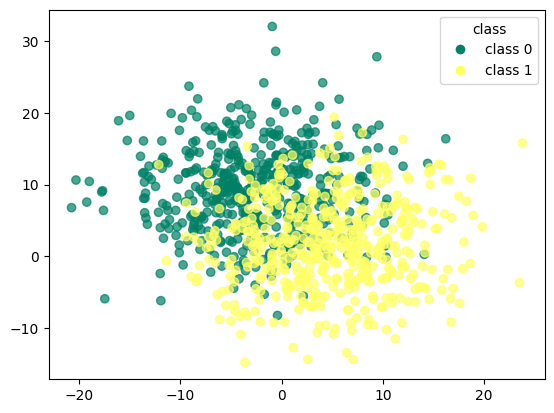

In [65]:
from matplotlib.lines import Line2D

scatter = plt.scatter(corr_dataset.iloc[:, 0], corr_dataset.iloc[:, 1], 
                      c=corr_dataset['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(corr_dataset['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

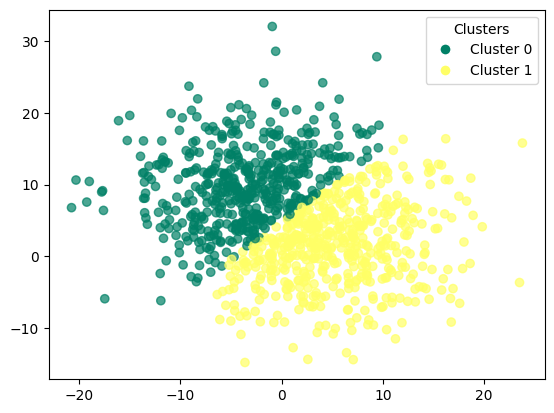

In [66]:
scatter = plt.scatter(corr_dataset.iloc[:, 0], corr_dataset.iloc[:, 1], 
                      c=corr_dataset['k_means'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(corr_dataset['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [67]:
kmeans.cluster_centers_

array([[-0.66997106,  0.64014609],
       [ 0.63856617, -0.61013924]])

In [68]:
print(confusion_matrix(corr_dataset['target'],corr_dataset['k_means']))

[[390 110]
 [ 98 402]]


In [69]:
print(classification_report(corr_dataset['target'],corr_dataset['k_means']))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       500
           1       0.79      0.80      0.79       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



### k-means with pca

In [70]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i,init = "k-means++")
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

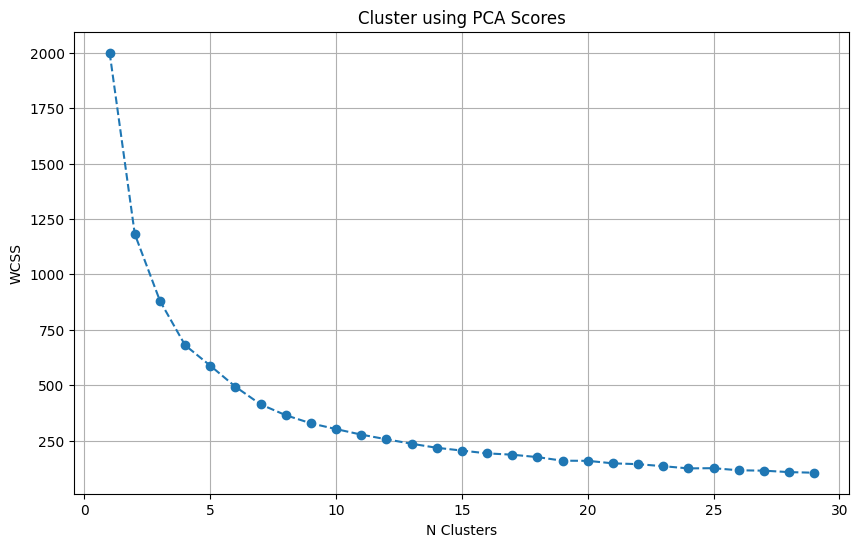

In [71]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o",linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [72]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [73]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2, random_state=42)

In [74]:
df_pca_kmeans = corr_dataset.copy()

In [75]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [76]:
df_pca_kmeans

,vab_1,vab_2,target,k_means,kmeans_pca
0,-6.831659,7.718899,0,0,0
1,-8.761505,7.740707,0,0,0
2,-13.535939,10.343486,0,0,0
3,-4.183721,3.488238,0,0,0
4,1.434718,15.384688,0,0,0
...,...,...,...,...,...
995,-6.537895,-0.864577,1,0,0
996,-8.512996,6.150630,1,0,0
997,-8.672221,2.678594,1,0,0
998,-7.158826,-0.443087,1,0,0


In [77]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.792
accuracy after: 0.792


In [78]:
df_pca_kmeans

,vab_1,vab_2,target,k_means,kmeans_pca
0,-6.831659,7.718899,0,0,0
1,-8.761505,7.740707,0,0,0
2,-13.535939,10.343486,0,0,0
3,-4.183721,3.488238,0,0,0
4,1.434718,15.384688,0,0,0
...,...,...,...,...,...
995,-6.537895,-0.864577,1,0,0
996,-8.512996,6.150630,1,0,0
997,-8.672221,2.678594,1,0,0
998,-7.158826,-0.443087,1,0,0


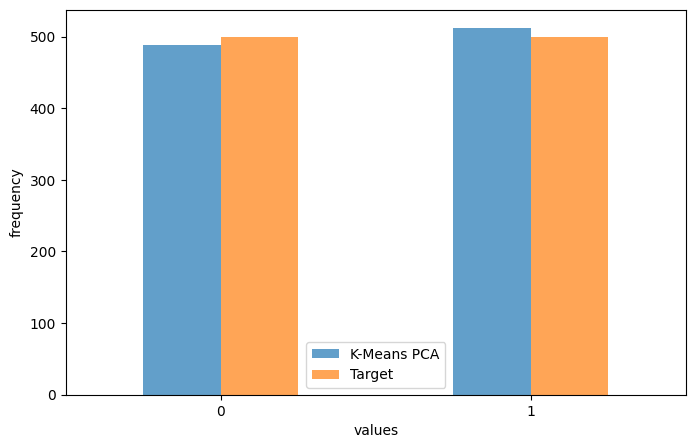

In [79]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [80]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[390 110]
 [ 98 402]]


In [81]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       500
           1       0.79      0.80      0.79       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



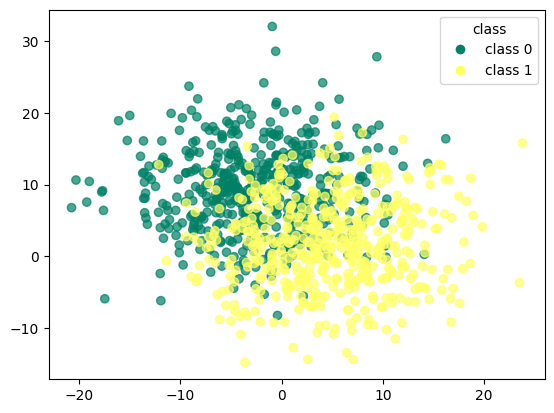

In [82]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

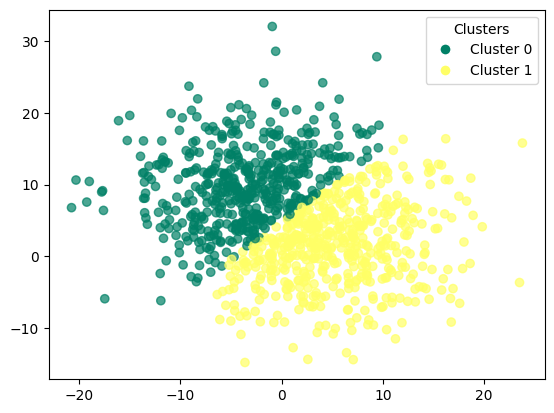

In [83]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

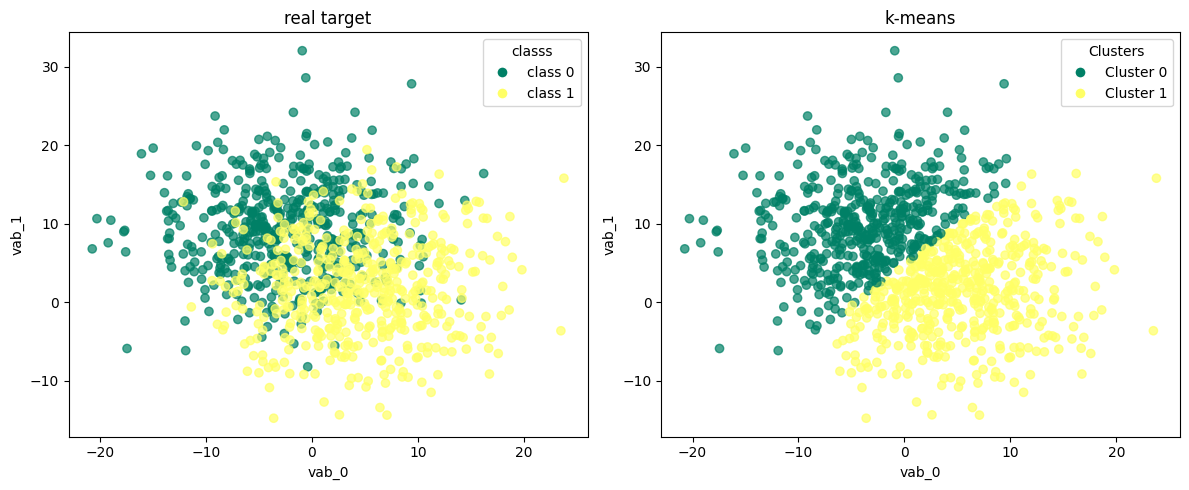

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

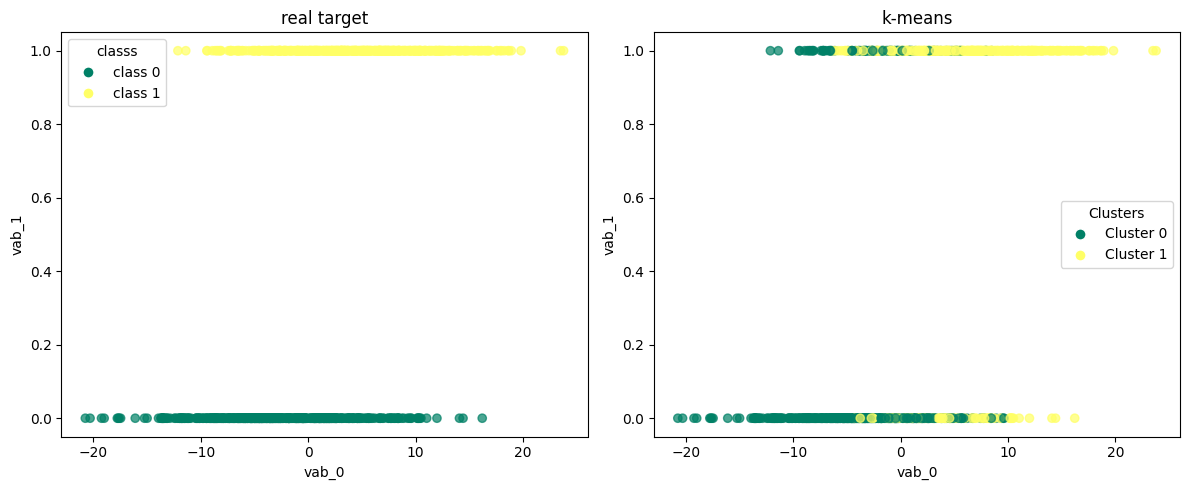

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

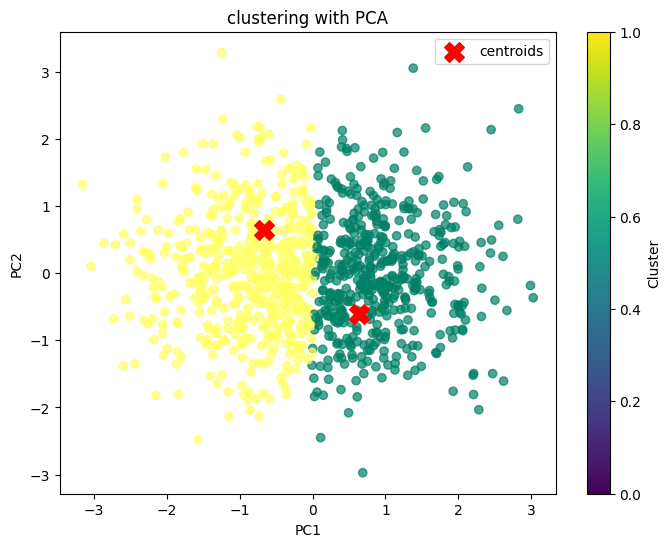

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

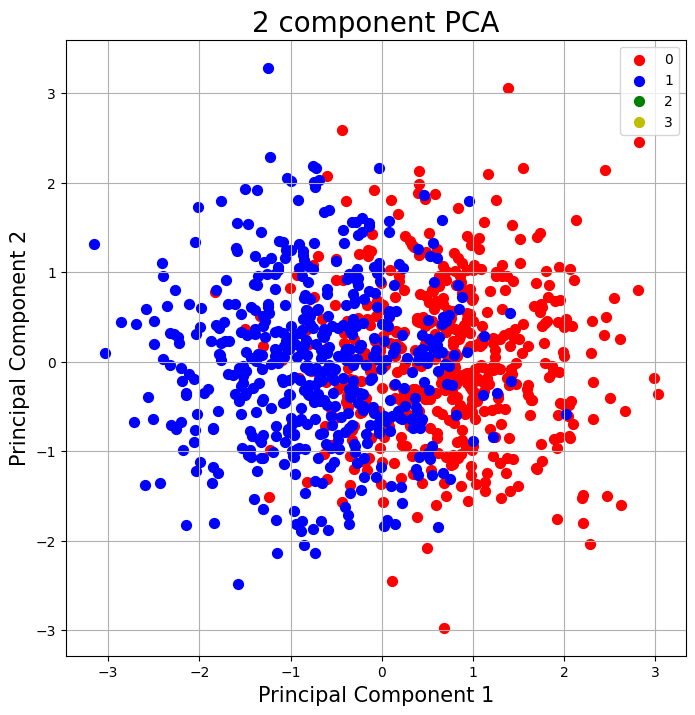

In [87]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### k-means with t-SNE

In [88]:
kmeans_tsne = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [89]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=2, random_state=42)

In [90]:
df_tsne_kmeans = corr_dataset.copy()

In [91]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [92]:
df_tsne_kmeans

,vab_1,vab_2,target,k_means,kmeans_tsne
0,-6.831659,7.718899,0,0,0
1,-8.761505,7.740707,0,0,0
2,-13.535939,10.343486,0,0,0
3,-4.183721,3.488238,0,0,0
4,1.434718,15.384688,0,0,0
...,...,...,...,...,...
995,-6.537895,-0.864577,1,0,1
996,-8.512996,6.150630,1,0,0
997,-8.672221,2.678594,1,0,0
998,-7.158826,-0.443087,1,0,1


In [93]:
y_true = df_tsne_kmeans['target'].values  
y_kmeans = df_tsne_kmeans['kmeans_tsne'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_tsne_kmeans['kmeans_tsne'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_tsne_kmeans['kmeans_tsne'] == y_true))

accuracy before: 0.789
accuracy after: 0.789


In [94]:
df_tsne_kmeans

,vab_1,vab_2,target,k_means,kmeans_tsne
0,-6.831659,7.718899,0,0,0
1,-8.761505,7.740707,0,0,0
2,-13.535939,10.343486,0,0,0
3,-4.183721,3.488238,0,0,0
4,1.434718,15.384688,0,0,0
...,...,...,...,...,...
995,-6.537895,-0.864577,1,0,1
996,-8.512996,6.150630,1,0,0
997,-8.672221,2.678594,1,0,0
998,-7.158826,-0.443087,1,0,1


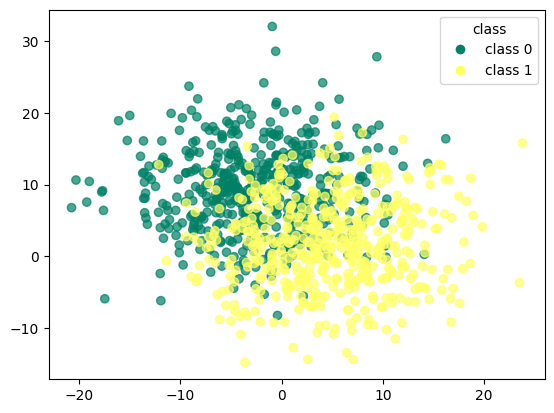

In [95]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_tsne_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

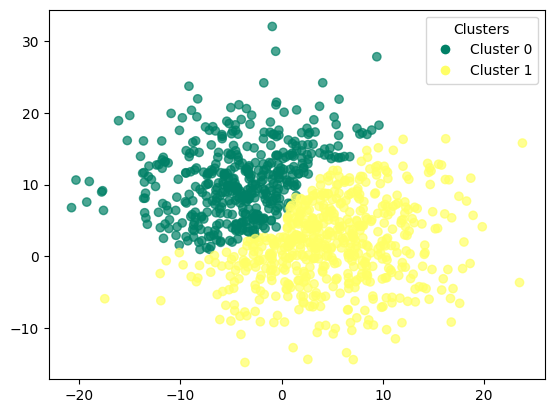

In [96]:
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 0], df_tsne_kmeans.iloc[:, 1], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

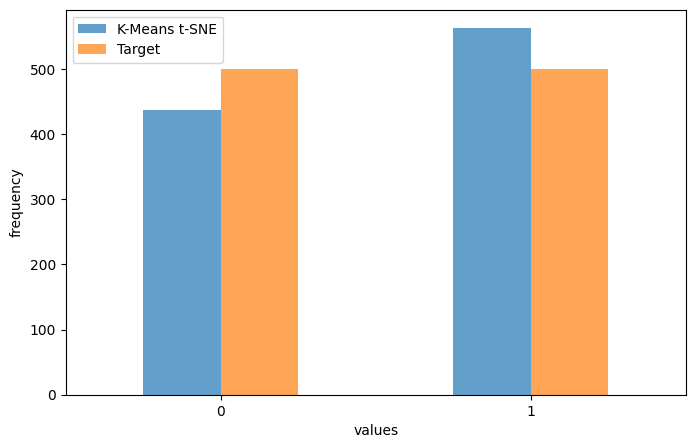

In [97]:
counts_kmeans = df_tsne_kmeans['kmeans_tsne'].value_counts().sort_index()
counts_target = df_tsne_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means t-SNE': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means t-SNE", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [98]:
print(confusion_matrix(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne']))

[[363 137]
 [ 74 426]]


In [99]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       500
           1       0.76      0.85      0.80       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



### k-means with UMAP

In [100]:
kmeans_UMAP = KMeans(n_clusters=2,init='k-means++',random_state=42)

In [101]:
kmeans_UMAP.fit(X_UMAP)

KMeans(n_clusters=2, random_state=42)

In [102]:
df_UMAP_kmeans = corr_dataset.copy()

In [103]:
df_UMAP_kmeans['kmeans_UMAP'] = kmeans_UMAP.labels_

In [104]:
df_UMAP_kmeans

,vab_1,vab_2,target,k_means,kmeans_UMAP
0,-6.831659,7.718899,0,0,0
1,-8.761505,7.740707,0,0,0
2,-13.535939,10.343486,0,0,0
3,-4.183721,3.488238,0,0,0
4,1.434718,15.384688,0,0,0
...,...,...,...,...,...
995,-6.537895,-0.864577,1,0,0
996,-8.512996,6.150630,1,0,0
997,-8.672221,2.678594,1,0,0
998,-7.158826,-0.443087,1,0,0


In [105]:
y_true = df_UMAP_kmeans['target'].values  
y_kmeans = df_UMAP_kmeans['kmeans_UMAP'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_UMAP_kmeans['kmeans_UMAP'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_UMAP_kmeans['kmeans_UMAP'] == y_true))

accuracy before: 0.772
accuracy after: 0.772


In [106]:
df_UMAP_kmeans

,vab_1,vab_2,target,k_means,kmeans_UMAP
0,-6.831659,7.718899,0,0,0
1,-8.761505,7.740707,0,0,0
2,-13.535939,10.343486,0,0,0
3,-4.183721,3.488238,0,0,0
4,1.434718,15.384688,0,0,0
...,...,...,...,...,...
995,-6.537895,-0.864577,1,0,0
996,-8.512996,6.150630,1,0,0
997,-8.672221,2.678594,1,0,0
998,-7.158826,-0.443087,1,0,0


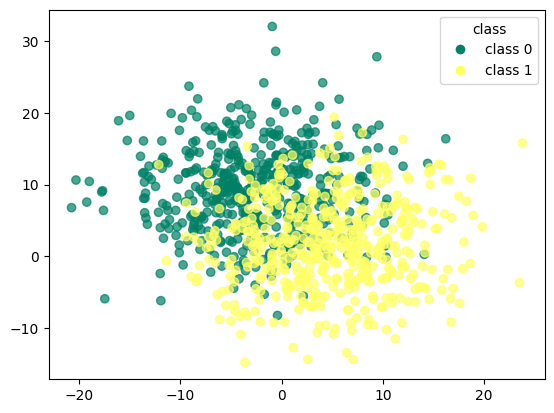

In [107]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_UMAP_kmeans.iloc[:, 0], df_UMAP_kmeans.iloc[:, 1], 
                      c=df_UMAP_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_UMAP_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

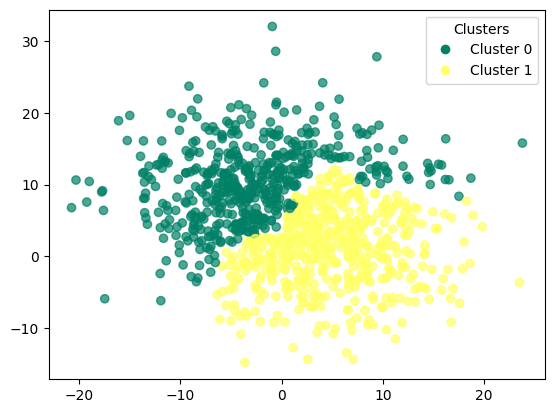

In [108]:
scatter = plt.scatter(df_UMAP_kmeans.iloc[:, 0], df_UMAP_kmeans.iloc[:, 1], 
                      c=df_UMAP_kmeans['kmeans_UMAP'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_UMAP_kmeans['kmeans_UMAP'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

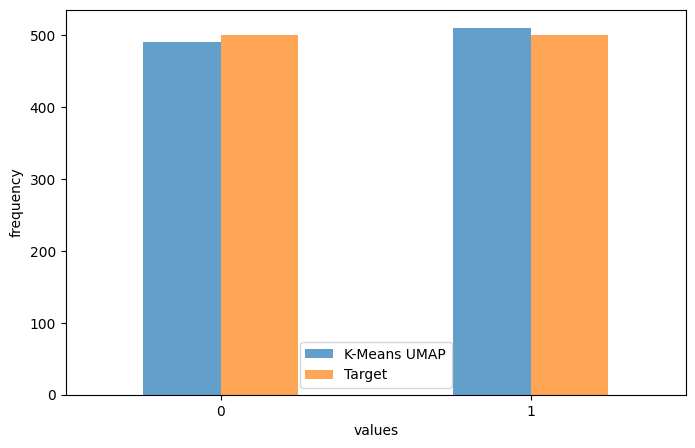

In [109]:
counts_kmeans = df_UMAP_kmeans['kmeans_UMAP'].value_counts().sort_index()
counts_target = df_UMAP_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means UMAP': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means UMAP", "Target"])
plt.xticks(rotation=0)  
plt.show()

In [110]:
print(confusion_matrix(df_UMAP_kmeans['target'],df_UMAP_kmeans['kmeans_UMAP']))

[[381 119]
 [109 391]]


In [111]:
print(classification_report(df_UMAP_kmeans['target'],df_UMAP_kmeans['kmeans_UMAP'])) 

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       500
           1       0.77      0.78      0.77       500

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000



# overall results

In [112]:
print(classification_report(df_UMAP_kmeans['target'],df_UMAP_kmeans['kmeans_UMAP'])) 

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       500
           1       0.77      0.78      0.77       500

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000



In [113]:
print(classification_report(df_tsne_kmeans['target'],df_tsne_kmeans['kmeans_tsne'])) 

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       500
           1       0.76      0.85      0.80       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



In [114]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       500
           1       0.79      0.80      0.79       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



In [115]:
print(classification_report(corr_dataset['target'],corr_dataset['k_means']))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       500
           1       0.79      0.80      0.79       500

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000

